<a href="https://colab.research.google.com/github/wldud01/Aiffel_online_Quest/blob/main/Quest2_%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quest2 - Project 1

In [1]:
#@title 모듈 한번에 불러오기
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [48]:
#@title 기존 데이터 불러오기
x = pd.read_csv("train.csv")
sub = pd.read_csv("test.csv")
print(f"train {data.shape}")
print(f"test {sub.shape}")

train (15035, 21)
test (6468, 20)


In [3]:
y = x['price']
del x['price']

print(x.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
train_len = len(x)
data = pd.concat((x, sub), axis=0)
sub_id = data['id'][train_len:]

In [5]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


- feature가 21개이고 sample이 2만개가 넘는 데이터이다

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27971 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             27971 non-null  int64  
 1   date           27971 non-null  object 
 2   bedrooms       27971 non-null  int64  
 3   bathrooms      27971 non-null  float64
 4   sqft_living    27971 non-null  int64  
 5   sqft_lot       27971 non-null  int64  
 6   floors         27971 non-null  float64
 7   waterfront     27971 non-null  int64  
 8   view           27971 non-null  int64  
 9   condition      27971 non-null  int64  
 10  grade          27971 non-null  int64  
 11  sqft_above     27971 non-null  int64  
 12  sqft_basement  27971 non-null  int64  
 13  yr_built       27971 non-null  int64  
 14  yr_renovated   27971 non-null  int64  
 15  zipcode        27971 non-null  int64  
 16  lat            27971 non-null  float64
 17  long           27971 non-null  float64
 18  sqft_li

- 결측값이 존재하지 않음
- date column을 제거하고 모두 수치형 데이터이기 때문에 추세나 분포, 이상치를 살펴보면 될 것 같다
- date column은 object type을 분리시켜서 수치형 데이터로 변환한다.

In [58]:
# id 제거
total_data = data.drop("id",axis =1)
# 년도, 월 데이터 생성
total_data['year'] = total_data['date'].str[:4]
total_data['month'] = total_data['date'].str[4:6]
total_data['day'] = total_data['date'].str[6:8]
total_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02
2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02
3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,...,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,06
4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,...,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,01


In [7]:
#@title date 제거, year, month data는 수치형으로 변경
total_data = total_data.drop("date",axis =1)
total_data['year'] = total_data['year'].astype(int)
total_data['month'] = total_data['month'].astype(int)

In [204]:
total_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,21503.000000,21503.000000,21503.000000,2.150300e+04,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000
mean,3.371762,2.116042,2081.441334,1.511715e+04,1.495140,0.007580,0.234618,3.409710,7.659164,1789.765986,291.675348,1971.055016,84.741943,98077.897968,47.560121,-122.213786,1987.242664,12774.529089,2014.320560,6.583546
std,0.930026,0.770018,918.669624,4.147591e+04,0.540183,0.086737,0.766453,0.650066,1.174422,828.481664,442.645882,29.372398,402.452836,53.489890,0.138615,0.140833,685.579479,27334.995914,0.466703,3.111287
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.000000,2.250000,1914.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,4.000000,2.500000,2550.000000,1.068600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678100,-122.125000,2370.000000,10085.000000,2015.000000,9.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


- 변수를 살펴보면, scale이 너무 차이남
- 이상치를 제거해줘야 할 것으로 보임

In [8]:
total_data_col = total_data.columns.tolist()
total_data_col

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year',
 'month']

In [10]:
total_data.shape

(21503, 20)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(total_data)
data_scaler = pd.DataFrame(scaler.transform(total_data),columns=total_data.columns.tolist())
data_scaler

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.0,0.893939,0.571498,0.217608,0.161934,0.005742,0.0,0.818182
1,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.0,0.136364,0.936143,0.237542,0.399415,0.008513,1.0,0.090909
2,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.0,0.368687,0.741354,0.393688,0.241094,0.007871,1.0,0.090909
3,0.090909,0.28125,0.107547,0.003816,0.4,0.0,0.0,0.5,0.500000,0.156250,0.000000,0.826087,0.0,0.010101,0.247386,0.159468,0.316469,0.007085,0.0,0.454545
4,0.090909,0.18750,0.058113,0.005567,0.0,0.0,0.0,0.5,0.500000,0.084430,0.000000,0.547826,0.0,0.994949,0.407914,0.169435,0.215281,0.010407,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,0.090909,0.21875,0.091321,0.006935,0.0,0.0,0.0,0.5,0.416667,0.132675,0.000000,0.991304,0.0,0.045455,0.247065,0.429402,0.158493,0.012236,0.0,0.454545
21499,0.090909,0.25000,0.090566,0.000367,0.8,0.0,0.0,0.5,0.583333,0.131579,0.000000,0.991304,0.0,0.722222,0.665916,0.191860,0.172260,0.000665,1.0,0.000000
21500,0.090909,0.31250,0.076981,0.000469,0.4,0.0,0.0,0.5,0.583333,0.097588,0.026971,0.939130,0.0,0.580808,0.677819,0.091362,0.160213,0.000705,1.0,0.090909
21501,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.947826,0.0,0.722222,0.705324,0.182724,0.106866,0.001558,0.0,0.454545


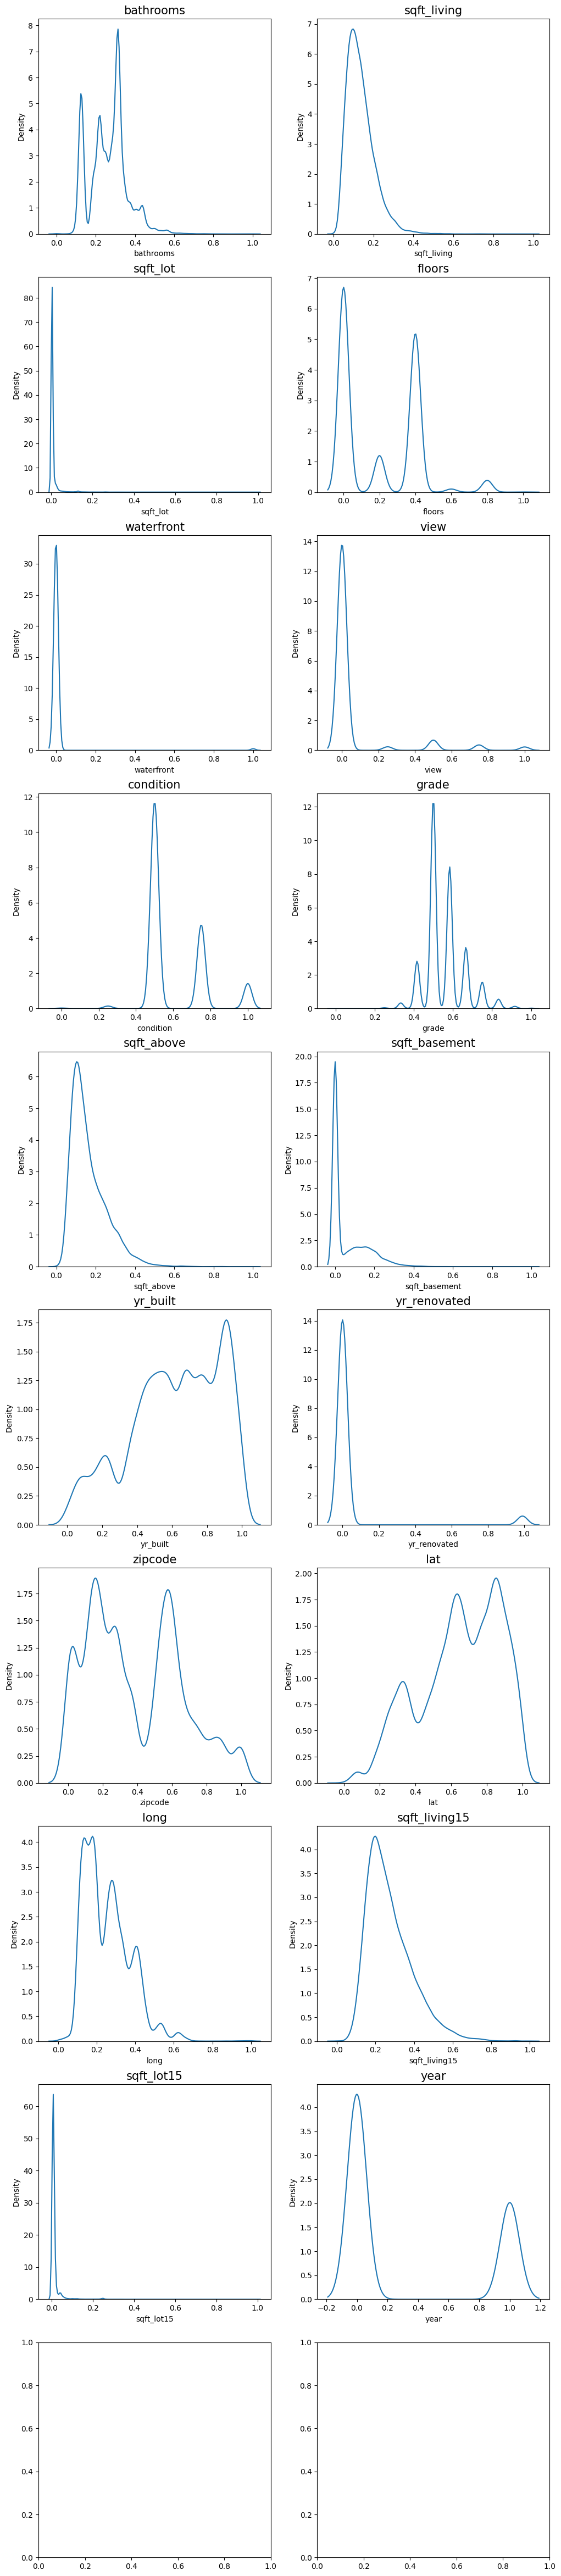

In [11]:
fig, ax = plt.subplots(10,2,figsize = (12,60))

count = 1
columns = data_scaler.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data_scaler[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [12]:
for c in total_data_col:
    data_scaler[c] = np.log1p(data_scaler[c].values)

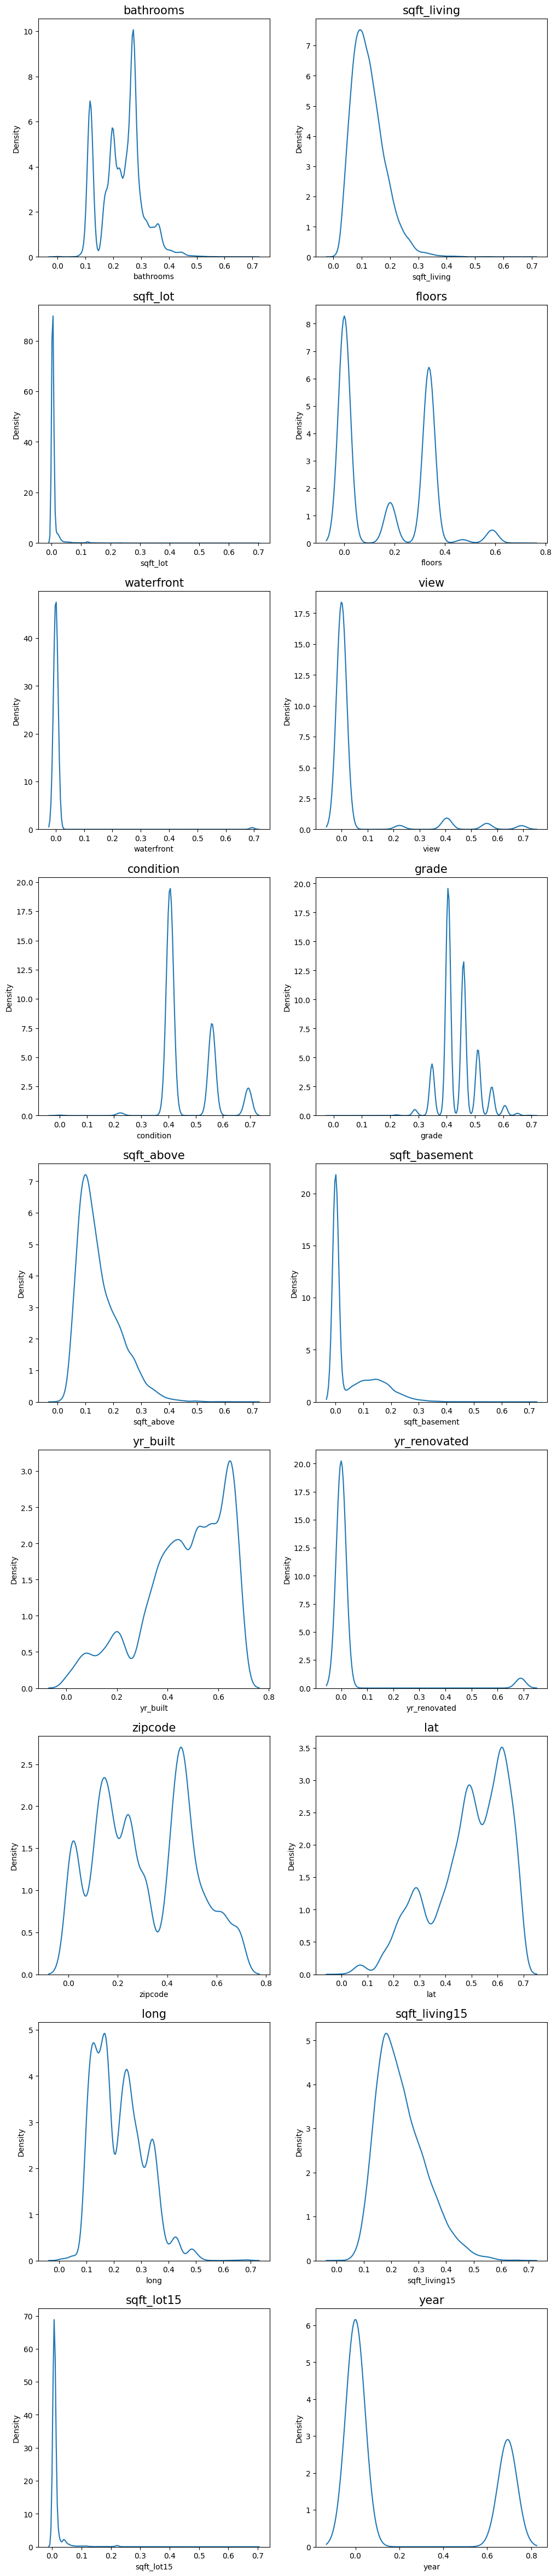

In [13]:
fig, ax = plt.subplots(9,2,figsize = (12,60))

count = 1
columns = data_scaler.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data_scaler[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

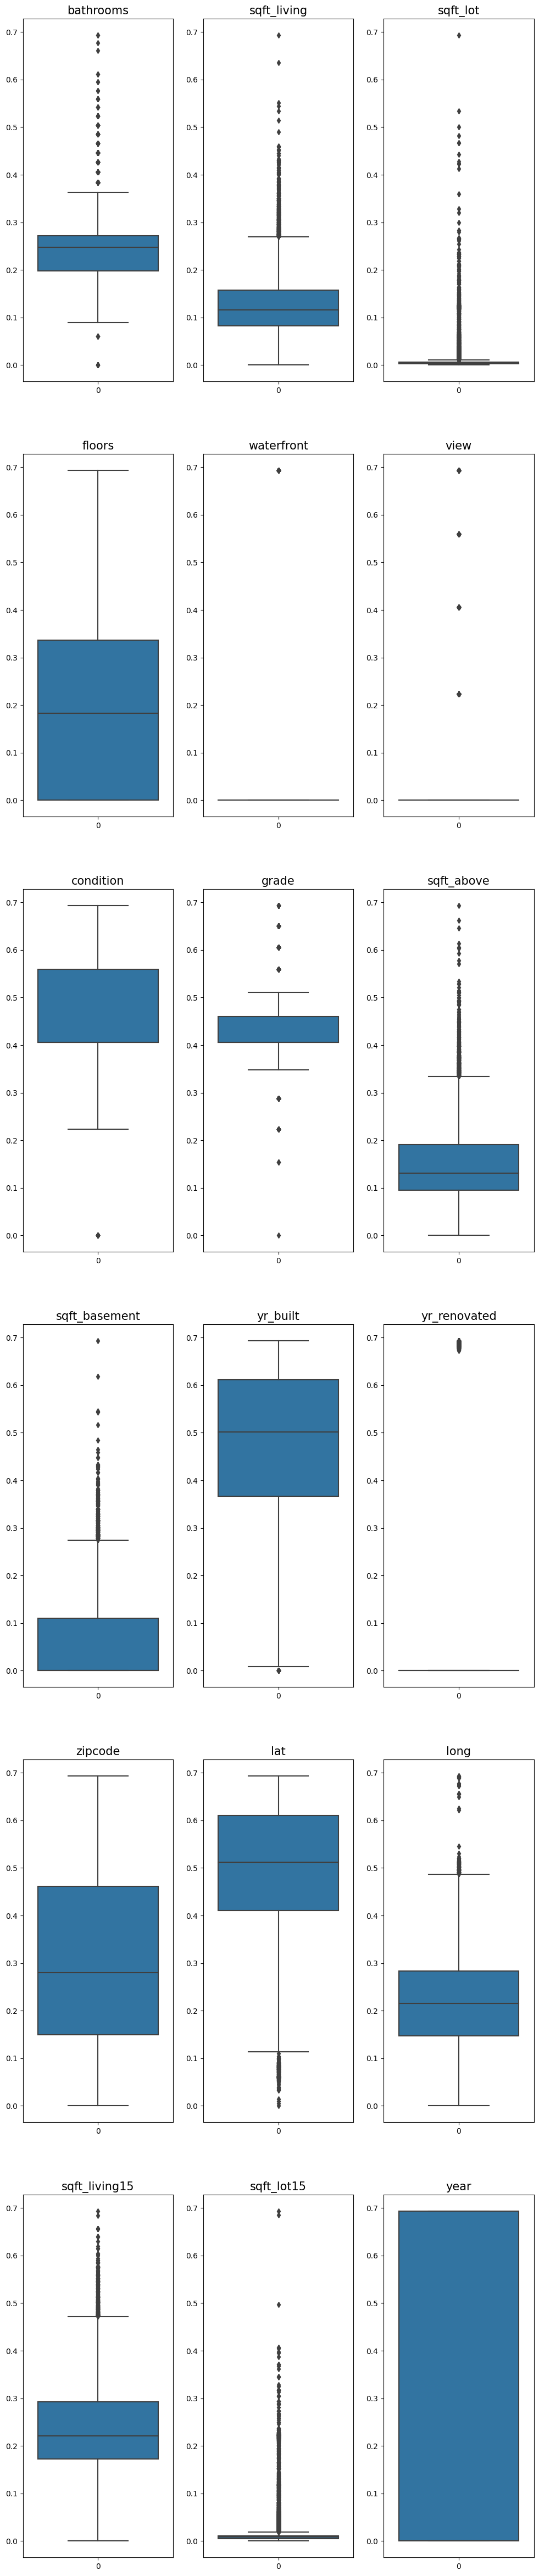

In [14]:
fig, ax = plt.subplots(6,3,figsize = (12,60))

count = 1
columns = data_scaler.columns
for row in range(6):
    for col in range(3):
        sns.boxplot(data=data_scaler[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [15]:
# 이상치 제거
def del_outlier(df,cols):
  for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    df.loc[df[col] < Q1-(1.5*IQR),col]=Q1-(1.5*IQR)
    df.loc[df[col] > Q3+(2.5*IQR),col]=Q3+(1.5*IQR)
  return df

data_outlier = del_outlier(data_scaler,total_data_col)
data_outlier.shape

(21503, 20)

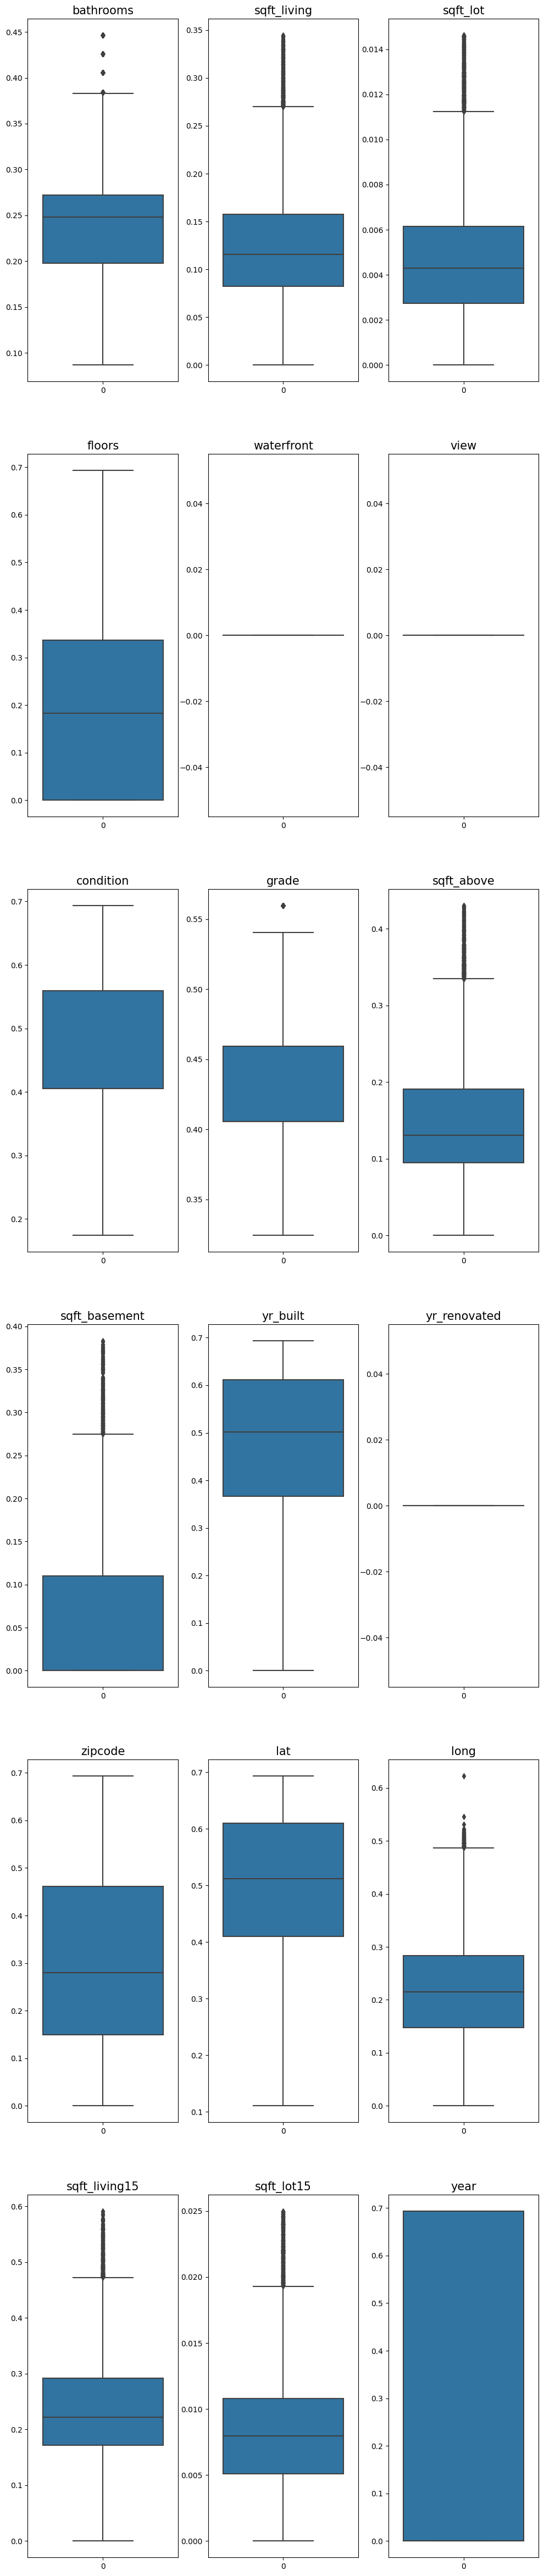

In [16]:
fig, ax = plt.subplots(6,3,figsize = (12,60))

count = 1
columns = total_data.columns
for row in range(6):
    for col in range(3):
        sns.boxplot(data=data_outlier[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

<Axes: >

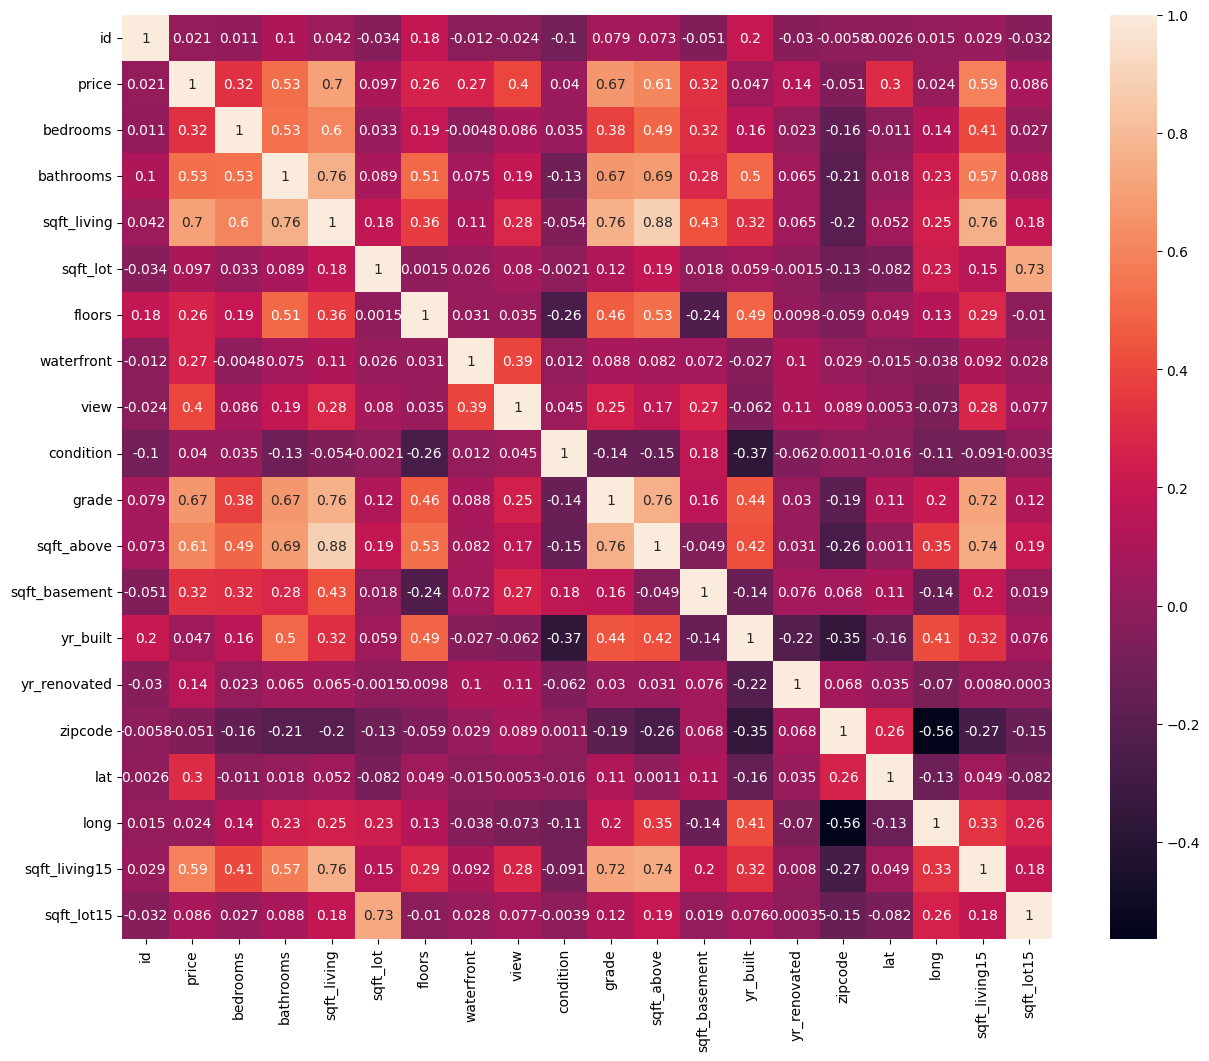

In [49]:
plt.figure(figsize=(15,12))
sns.heatmap(x.corr(),annot = True)

In [18]:
data_outlier.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

- outlier은 사실 불확실성이 너무 커서 모두 부정확한 데이터는 제거하고 시작하려 했으나 너무 많은 데이터가 있는 관계로 maximum 값으로 진행
- 6409개 정도

- Quantiles transformer 진행한 경우
  - 24	gbdt	0.5	0.10	8	sqrt	400	20	-0.025568	0.159901
  - 21	gbdt	0.5	0.10	8	sqrt	350	20	-0.025613	0.160040

- 표준화까지 진행한 경우
  - gbdt	0.5	0.1	12	sqrt	400	25	-0.025537	0.159803

- gbdt	0.5	0.1	12	sqrt	400	25	-0.025537	0.159803